# Keras Implementation
Using CNN to classify standing and sitting postures.

In [ ]:
#from keras.models import Sequential
#from keras.layers import Conv2D , MaxPooling2D

In [177]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Generating Data and splitting into respective training and test data

In [2]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./25)
train = train_data.flow_from_directory('training_data',target_size=(64,64),batch_size = 32,class_mode='binary')
test = test_data.flow_from_directory('test',target_size=(64,64),batch_size=32,class_mode='binary')

Found 464 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


## Using Resampling Technique to avoid Overfitting

By using sklearn's cross validation Kfold function, resampling into 10 seperate rows of train data. 

In [6]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
#Simple K-Fold cross validation. 10 folds.
cv = cross_validation.KFold(len(train), n_folds=10)

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units= 128 , activation = 'relu'))
model.add(Dense(units=1,activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [11]:
model.fit_generator(train,steps_per_epoch=4000,epochs = 5,validation_data=test,validation_steps=2000)

Epoch 1/5
4000/4000 [==============================] - 708s 177ms/step - loss: 0.0478 - acc: 0.9879 - val_loss: 0.9992 - val_acc: 0.8889
Epoch 2/5
4000/4000 [==============================] - 613s 153ms/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.8857 - val_acc: 0.9444
Epoch 3/5
4000/4000 [==============================] - 637s 159ms/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.8857 - val_acc: 0.9444
Epoch 4/5
4000/4000 [==============================] - 613s 153ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.8857 - val_acc: 0.9444
Epoch 5/5
4000/4000 [==============================] - 611s 153ms/step - loss: 0.0010 - acc: 0.9997 - val_loss: 1.7811 - val_acc: 0.8889


## Testing for Data, using Predict()

In [3]:
from keras.preprocessing import image
imagetest = image.load_img('E:/shujath-academics/academics/Projects/Major Project/training_data/sitting/9.jpg',target_size=(64,64))

Using TensorFlow backend.


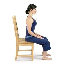

In [4]:
imagetest

In [171]:
imagetest = image.img_to_array(imagetest)

In [172]:
imagetest = np.expand_dims(imagetest,axis = 0)

In [173]:
train.class_indices

{'sitting': 0, 'standing': 1}

In [174]:
if result[0][0]==1:
    prediction = 'standing'
else:
    prediction = 'sitting'

In [175]:
result = model.predict(imagetest)

In [176]:
prediction

'sitting'